In [1]:
from random import gauss
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
# GARCH(2,2)
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

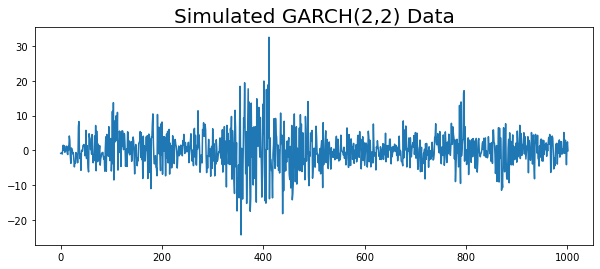

In [3]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

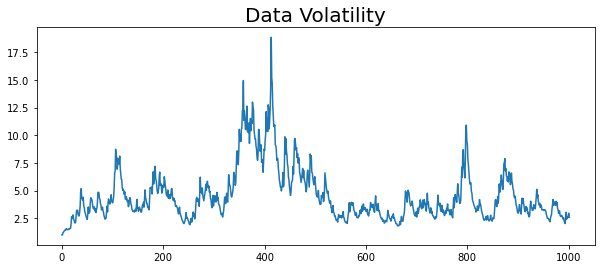

In [4]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

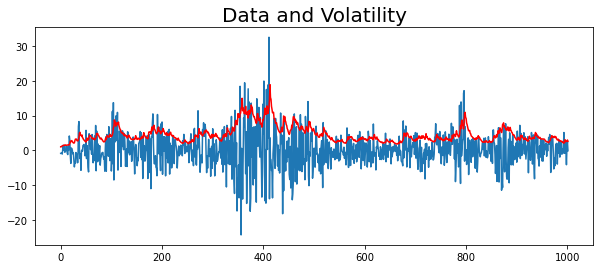

In [5]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

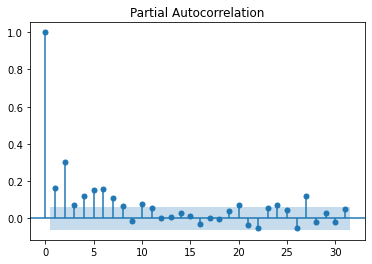

In [6]:
plot_pacf(np.array(series)**2)
plt.show()

In [7]:
train, test = series[:-test_size], series[-test_size:]

In [8]:
model = arch_model(train, p=2, q=2)

In [9]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 3190.182090192021
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4355.004267760469
Iteration:      3,   Func. Count:     26,   Neg. LLF: 3028.7305079733037
Iteration:      4,   Func. Count:     36,   Neg. LLF: 2618.2078904934588
Iteration:      5,   Func. Count:     45,   Neg. LLF: 2578.2771665195323
Iteration:      6,   Func. Count:     53,   Neg. LLF: 2578.306628631667
Iteration:      7,   Func. Count:     61,   Neg. LLF: 2580.727171667895
Iteration:      8,   Func. Count:     70,   Neg. LLF: 2577.778389149492
Iteration:      9,   Func. Count:     77,   Neg. LLF: 2577.778037668478
Iteration:     10,   Func. Count:     84,   Neg. LLF: 2577.778032577594
Iteration:     11,   Func. Count:     90,   Neg. LLF: 2577.778032577595
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2577.778032577594
            Iterations: 11
            Function evaluations: 90
            Gradient evaluations:

In [10]:
print(model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -2577.78
Distribution:                  Normal   AIC:                           5167.56
Method:            Maximum Likelihood   BIC:                           5196.38
                                        No. Observations:                  902
Date:                Sun, Nov 22 2020   Df Residuals:                      896
Time:                        16:16:09   Df Model:                            6
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         3.1915e-03      0.114  2.794e-02      0.978 [ -0.221,  0.22

In [11]:
predictions = model_fit.forecast(horizon=test_size)

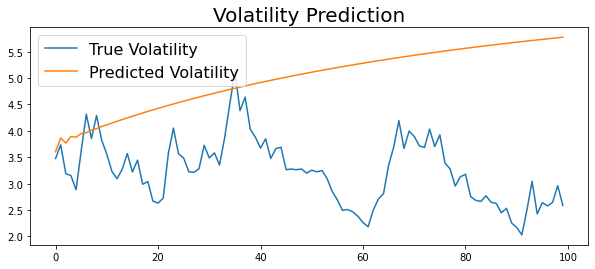

In [12]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

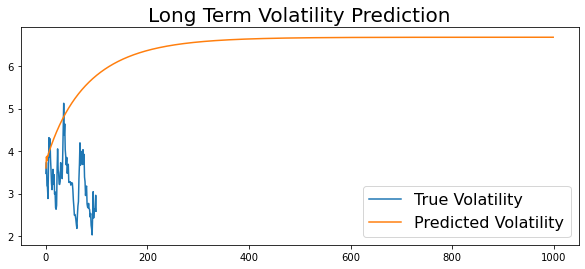

In [13]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

In [14]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

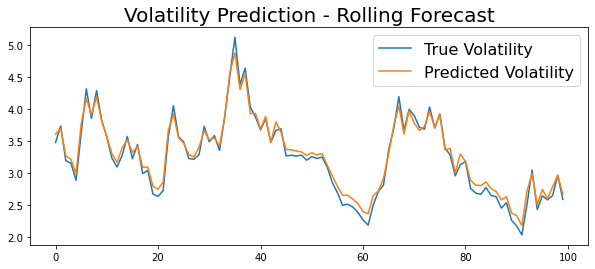

In [15]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)